In [ ]:
#@title Getting Ready For Show

!pip install transformers diffusers accelerate scipy safetensors

import nltk
nltk.download('punkt')
import PIL
import requests
import torch
import pandas as pd
from PIL import Image
from diffusers import DiffusionPipeline
from diffusers import StableDiffusionPipeline, StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline, BartTokenizer, BartForConditionalGeneration


cv_model_id = "nitrosocke/Ghibli-Diffusion"
cv_pipe = StableDiffusionPipeline.from_pretrained(cv_model_id, torch_dtype=torch.float16)
cv_pipe = cv_pipe.to("cuda")


summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

nst_model_id = "timbrooks/instruct-pix2pix"
nst_pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(nst_model_id, torch_dtype=torch.float16, safety_checker=None)
nst_pipe.to("cuda")
nst_pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(nst_pipe.scheduler.config)


def split_into_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

### 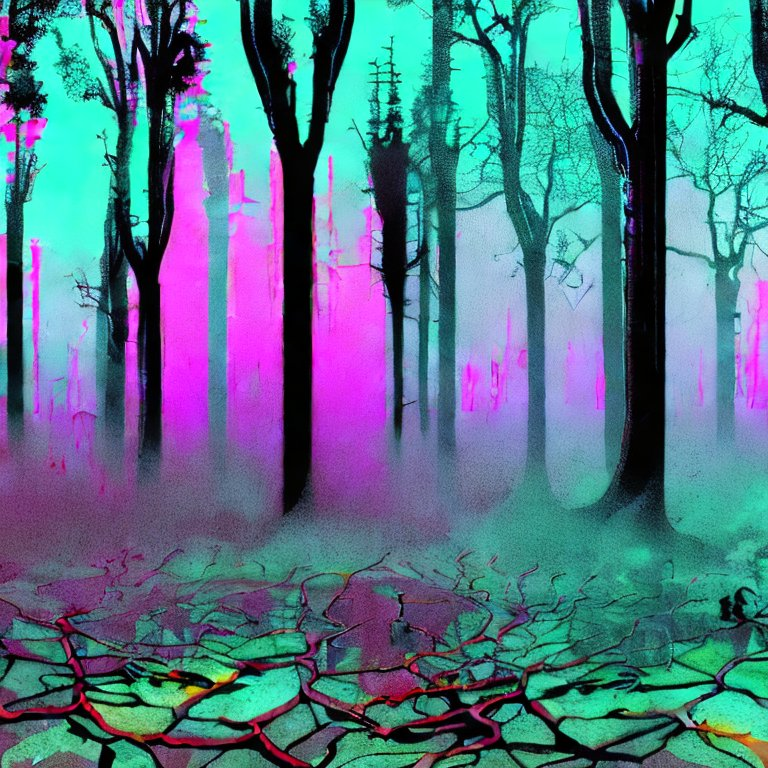
###eerie

Once upon a time, in a magical land called Brightlandia, there lived a young and curious bunny named Bouncy. Bouncy had soft, fluffy fur as white as snow and big, bright blue eyes that sparkled like sapphires. Every day, Bouncy hopped around the lush meadows, exploring the wonders of nature and meeting new friends.
One sunny morning, Bouncy woke up early and decided to venture deeper into the forest than ever before. As Bouncy hopped along a winding path, a mischievous squirrel named Rustle scampered down from a nearby tree.
"Hello there, little bunny! Where are you off to today?" Rustle asked, his tail twitching with excitement.
"I'm exploring the forest to find something extraordinary," Bouncy replied with enthusiasm.
"Ah, I know just the place!" Rustle exclaimed. "There's a hidden tree hollow deep within the forest that holds a magical secret. Would you like me to show you?"
Bouncy's eyes lit up with wonder. "Yes, please! Lead the way, Rustle!"
And so, Rustle led Bouncy through the forest, weaving between tall trees and colorful flowers. They hopped over babbling brooks and ducked under low-hanging branches until they reached a majestic ancient oak tree. Rustle pointed to a small opening nestled among the roots.
"Here it is, Bouncy! The secret hollow!" Rustle declared.
Bouncy's heart raced with anticipation as they both entered the cozy hollow. The air was filled with a sweet, enchanting fragrance. Inside, they discovered a magical book, bound in shimmering leather, resting on a velvet cushion.
Curiosity tingling in their paws, Bouncy and Rustle opened the book. To their surprise, it was filled with stories that came to life before their eyes. They watched as knights battled fiery dragons, mermaids swam through vast oceans, and animals from far-off lands danced in harmony.
Intrigued by the stories, Bouncy and Rustle decided to share these magical tales with the other animals in Brightlandia. Word quickly spread, and soon, animals from all corners of the land gathered in the forest, captivated by the book's enchanting stories.
Every day, Bouncy and Rustle would read aloud from the book, bringing joy and inspiration to their friends. The animals laughed, cried, and learned valuable lessons from the tales they heard. The once-hidden tree hollow became a place of love, friendship, and endless imagination.
Bouncy and Rustle realized the power of stories and the magic they held within. They taught their friends that anyone could create their own adventures by using their imagination and sharing stories with others. The animals of Brightlandia embraced this lesson and lived happily ever after, forever cherishing the gift of storytelling.
And so, in the heart of the magical forest, Bouncy and Rustle continued to share stories, enchanting the animals with endless tales of wonder, and reminding them that within the pages of a book, or the depths of their own imaginations, incredible adventures awaited them all.



In [ ]:
#@title Text Summarization
story = "Once upon a time, in a tiny village nestled at the foot of a magnificent mountain, there lived a little girl named Lily. Lily had the most vibrant red hair and a smile that could brighten the gloomiest day. She had a heart full of kindness and a spirit full of adventure. One sunny morning, as Lily set off on her daily stroll through the meadow, she noticed something peculiar near a sparkling brook. It was a tiny, lost bunny with soft, white fur and eyes that shimmered like the stars. Lily's heart went out to the little bunny, and she knew she had to help. \"I'll call you Cotton,\" Lily said, gently scooping up the bunny in her hands. She cradled Cotton close to her chest and promised to find its home. With Cotton nestled safely in her arms, Lily embarked on a quest to discover where the little bunny belonged. Together, they traveled through enchanting forests, across flowing rivers, and over rolling hills. Along the way, they encountered various animal friends who offered their assistance. A wise old turtle named Terrance guided them with his slow and steady wisdom, while a playful squirrel named Hazel showed them secret shortcuts through the trees. As they continued their journey, they stumbled upon a magical garden, blooming with the most beautiful flowers they had ever seen. The flowers seemed to dance in the breeze, and their fragrances filled the air with sweetness. In the center of the garden, they found a sign that read, \"Lost Creatures' Haven.\" Curiosity tugged at Lily's heart, urging her to explore the garden further. Cotton hopped eagerly beside her as they ventured deeper into the haven. There, they discovered a whole community of lost animals\u2014a kitten, a bird with a broken wing, and even a lost puppy. It was a sanctuary where animals in need found love and care. Lily and Cotton decided to stay and help the animals in the haven. They became friends with the kitten, whom they named Whiskers, and nursed the bird's wing back to health. The lost puppy, whom they named Scout, joined their little family too. Together, they created a home filled with love and warmth, where all the lost creatures could find solace and companionship. Word of the haven spread throughout the village, and people came from far and wide to adopt the animals and offer them forever homes. Lily's heart swelled with happiness as she saw the joy on the faces of those who found their furry companions. As time passed, the haven thrived, and Lily knew she had made a difference in the lives of these animals. She realized that sometimes, the greatest adventures and the most meaningful friendships are found in unexpected places. And so, Lily's haven became a symbol of hope and compassion. It reminded everyone that a small act of kindness can change lives and that love has the power to heal even the deepest wounds. From that day forward, Lily's red hair shone even brighter, reflecting the love and kindness in her heart. And whenever she looked into Cotton's eyes, she knew that they had both found their true home\u2014a place where love, friendship, and the magic of second chances bloomed forever." #@param {type:"string"}
sum = summarizer(story, truncation=True, max_length=450, min_length=125, do_sample=False, num_beams=15, early_stopping=True, no_repeat_ngram_size=7)

sum_list = split_into_sentences(sum[0]['summary_text'])
#sum_list.remove('For more, visit CNN.com/soulmatestories and follow us on Facebook and Twitter.')
for i in sum_list:
  print("\n" + i)


Once upon a time, in a tiny village nestled at the foot of a magnificent mountain, there lived a little girl named Lily.

She had a heart full of kindness and a spirit full of adventure.

One sunny morning, as Lily set off on her daily stroll through the meadow, she noticed something peculiar near a sparkling brook.

It was a tiny, lost bunny with soft, white fur and eyes that shimmered like the stars.

Lily's heart went out to the little bunny, and she knew she had to help.

Together, they created a home filled with love and warmth, where all the lost creatures could find solace and companionship.


  0%|          | 0/50 [00:00<?, ?it/s]

 Once upon a time, in a tiny village nestled at the foot of a magnificent mountain, there lived a little girl named Lily.


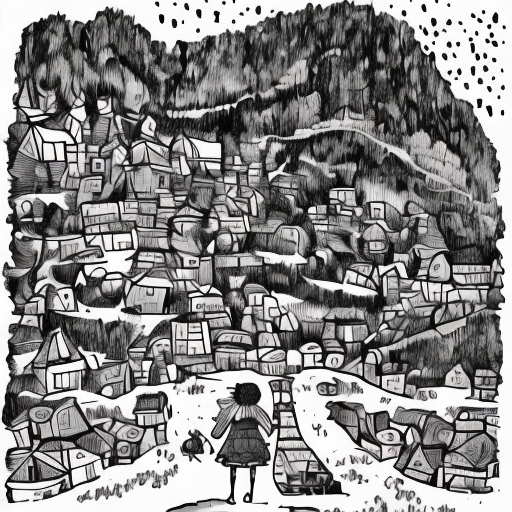

  0%|          | 0/50 [00:00<?, ?it/s]

She had a heart full of kindness and a spirit full of adventure.


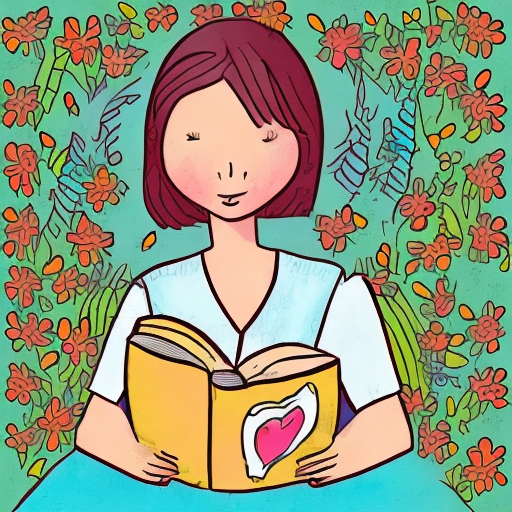

  0%|          | 0/50 [00:00<?, ?it/s]

One sunny morning, as Lily set off on her daily stroll through the meadow, she noticed something peculiar near a sparkling brook.


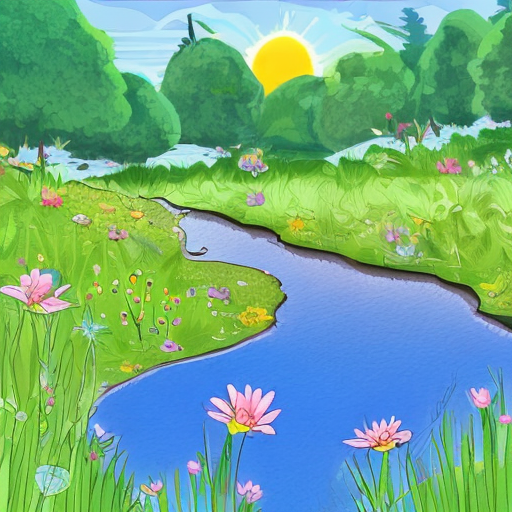

  0%|          | 0/50 [00:00<?, ?it/s]

It was a tiny, lost bunny with soft, white fur and eyes that shimmered like the stars.


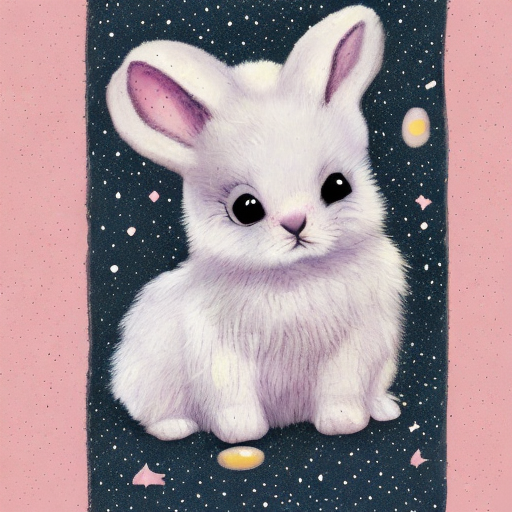

  0%|          | 0/50 [00:00<?, ?it/s]

Lily's heart went out to the little bunny, and she knew she had to help.


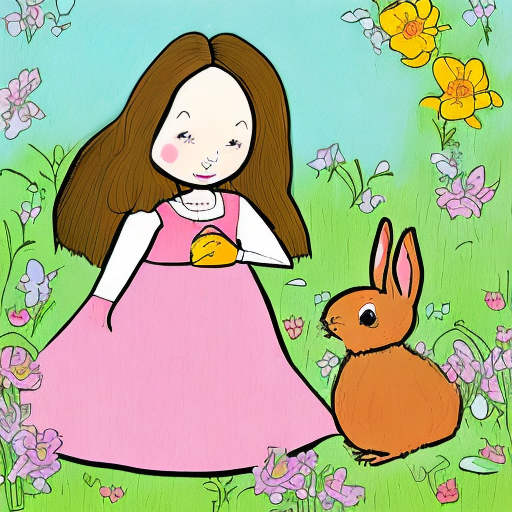

  0%|          | 0/50 [00:00<?, ?it/s]

Together, they created a home filled with love and warmth, where all the lost creatures could find solace and companionship.


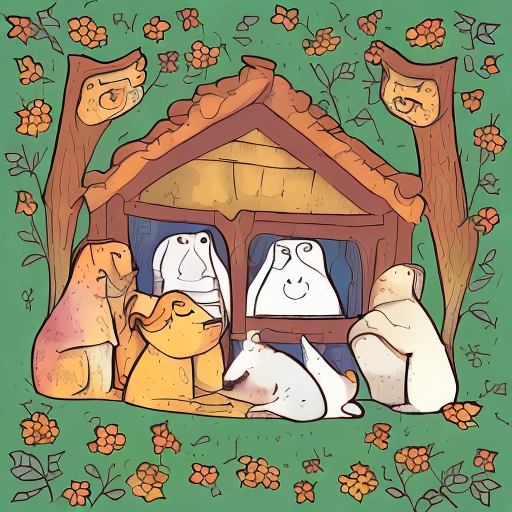

In [ ]:
#@title Image Generation
story = " Once upon a time, in a tiny village nestled at the foot of a magnificent mountain, there lived a little girl named Lily. She had a heart full of kindness and a spirit full of adventure. One sunny morning, as Lily set off on her daily stroll through the meadow, she noticed something peculiar near a sparkling brook. It was a tiny, lost bunny with soft, white fur and eyes that shimmered like the stars. Lily's heart went out to the little bunny, and she knew she had to help. Together, they created a home filled with love and warmth, where all the lost creatures could find solace and companionship." #@param {type:"string"}
text = split_into_sentences(story)
for i,x in zip(range(len(text)),text):
  prompt = x  + "storybook illustration"
  image = cv_pipe(prompt).images[0]
  image.save(str(i) + ".png")
  print(x)
  display(image)

  0%|          | 0/150 [00:00<?, ?it/s]

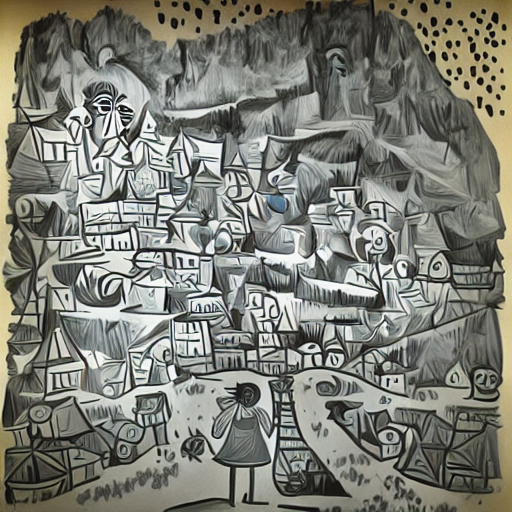

  0%|          | 0/150 [00:00<?, ?it/s]

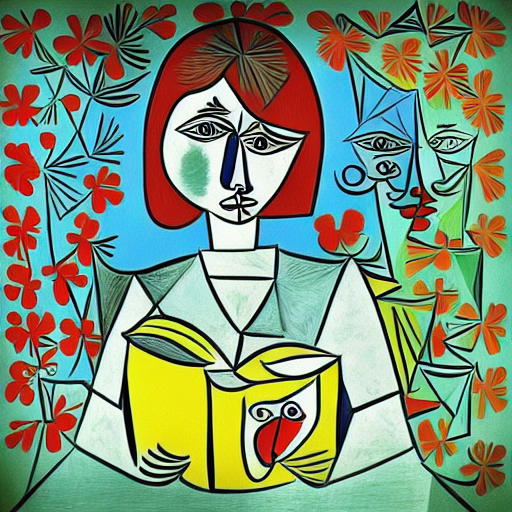

  0%|          | 0/150 [00:00<?, ?it/s]

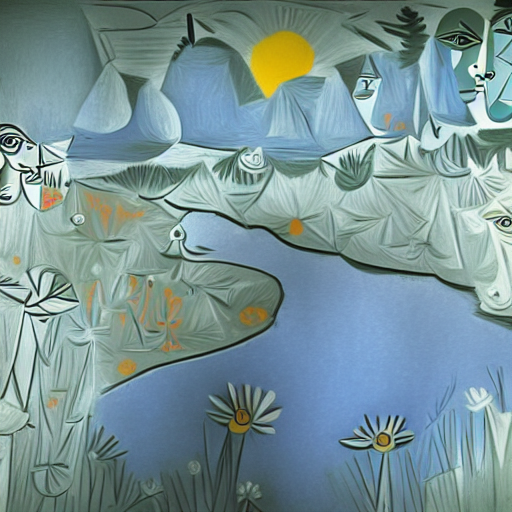

  0%|          | 0/150 [00:00<?, ?it/s]

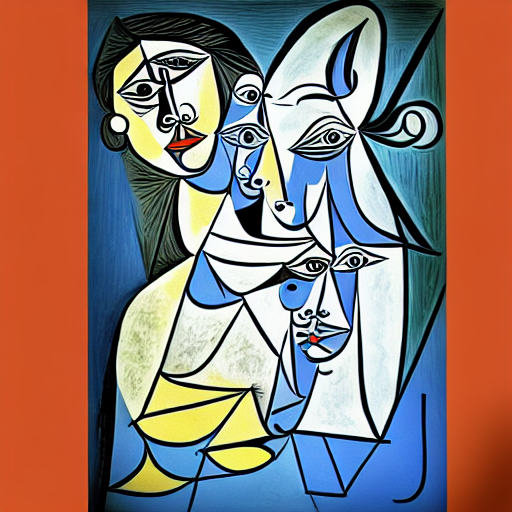

  0%|          | 0/150 [00:00<?, ?it/s]

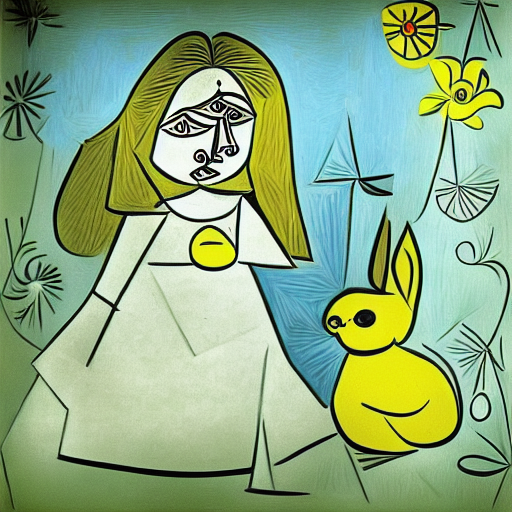

  0%|          | 0/150 [00:00<?, ?it/s]

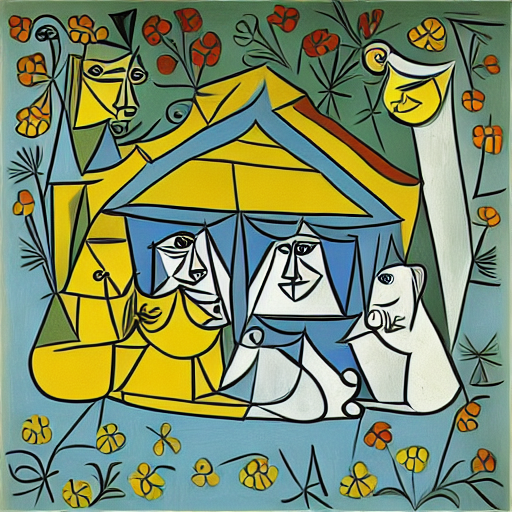

In [ ]:
#@title Style Transfer
style = "picasso" #@param {type:"string"}

for i in range(len(text)):
  image = Image.open(str(i) + ".png")
  images = nst_pipe(style, image=image, num_inference_steps=150, image_guidance_scale=1).images
  images[0].save(str(i) + style + ".png")
  display(images[0])
